In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset  = pd.read_csv('/root/Video_Games_Sales.csv')
dataset.head()

new_df = dataset


In [26]:
dataset.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


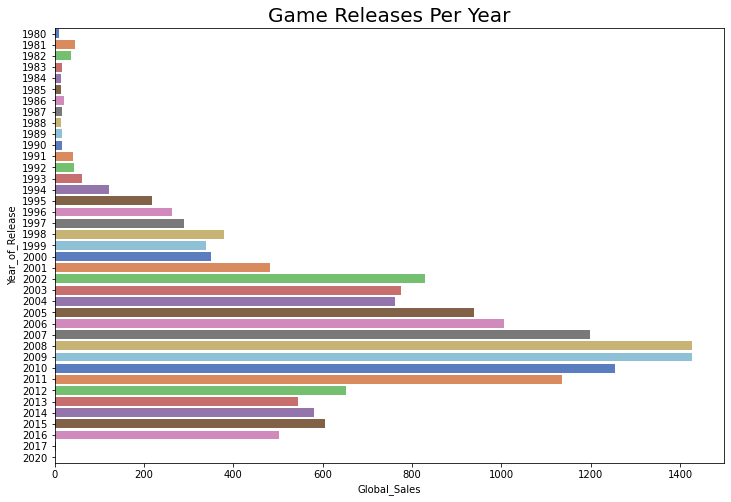

In [27]:
# Data Visualization
x = dataset.groupby(['Year_of_Release']).count()
x = x['Global_Sales']
y = x.index.astype(int)

plt.figure(figsize=(12,8))
colors = sns.color_palette("muted")
ax = sns.barplot(y = y, x = x, orient='h', palette=colors)
ax.set_title(label='Game Releases Per Year', fontsize=20)
plt.show()


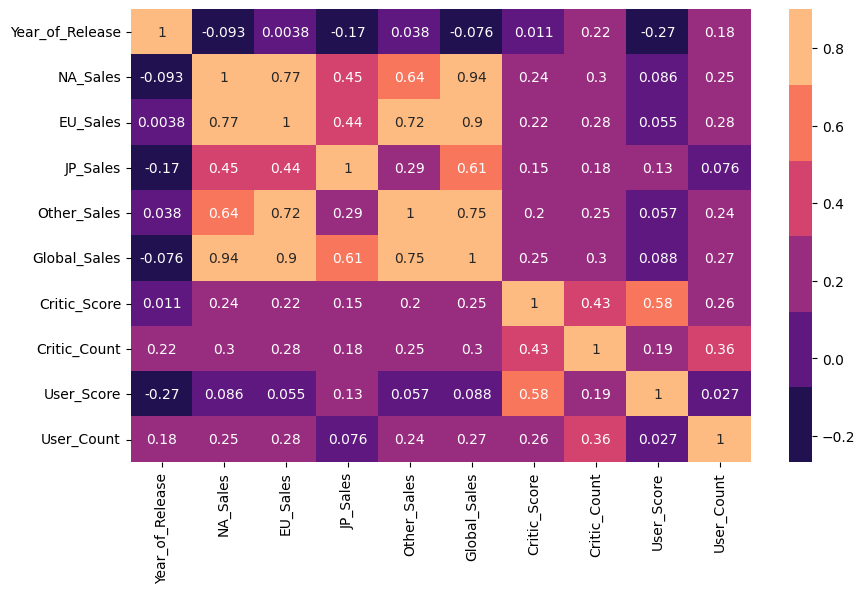

In [8]:
#correlation
plt.figure(figsize =(10,6),dpi =100)
color = sns.color_palette("magma")
sns.heatmap(dataset.corr(),vmax=0.9,annot=True,cmap=color)

In [9]:
# Dropping certain less important features
dataset.drop(columns = ['Year_of_Release', 'Developer', 'Publisher', 'Platform'], inplace = True)

# To view the columns with missing values
print('Feature name || Total missing values')
print(dataset.isna().sum())

Feature name || Total missing values
Name               2
Genre              2
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    8582
Critic_Count    8582
User_Score      9129
User_Count      9129
Rating          6769
dtype: int64


In [10]:
X = dataset.iloc[:, :].values
X = np.delete(X, 6, 1)
y = dataset.iloc[:, 6:7].values


In [11]:
# Splitting the dataset into Train and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Saving name of the games in training and test set
games_in_training_set = X_train[:, 0]
games_in_test_set = X_test[:, 0]
# Dropping the column that contains the name of the games
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]


In [12]:
#filling missing values 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train[:, [5 ,6, 7, 8]] = imputer.fit_transform(X_train[:, [5, 6, 7, 8]])
X_test[:, [5 ,6, 7, 8]] = imputer.transform(X_test[:, [5, 6, 7, 8]])
from sklearn_pandas import CategoricalImputer
categorical_imputer = CategoricalImputer(strategy = 'constant', fill_value = 'NA')
X_train[:, [0, 9]] = categorical_imputer.fit_transform(X_train[:, [0, 9]])
X_test[:, [0, 9]] = categorical_imputer.transform(X_test[:, [0, 9]])


In [13]:
#encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0, 9])], remainder = 'passthrough') 
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Used Linear Regression on the data

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score - ',r2_score(y_test,y_pred))
print('MAE - ',mean_absolute_error(y_test,y_pred))


R2 score -  0.9999871024748425
MAE -  0.0028887141617148686


In [18]:
#Displaying the Predicted and Actual Values

games_in_test_set = games_in_test_set.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)
predictions = np.concatenate([games_in_test_set, y_pred, y_test], axis = 1)
predictions = pd.DataFrame(predictions, columns = ['Name', 'Predicted_Global_Sales', 'Actual_Global_Sales'])
predictions

,Name,Predicted_Global_Sales,Actual_Global_Sales
0,R-Type Final,0.180315,0.19
1,The Terminator: Dawn of Fate,0.4106,0.41
2,Dead to Rights: Retribution,0.290356,0.28
3,Skylanders SWAP Force,2.15026,2.15
4,DiRT,1.050121,1.05
...,...,...,...
5011,Dynasty Warriors,0.500498,0.51
5012,Transformers: Dark of the Moon,0.170438,0.17
5013,Brunswick Pro Bowling,0.210146,0.21
5014,Valentino Rossi: The Game,0.070324,0.08
